In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
# Get or create a Dataset
X, y = make_regression(n_samples= 10000, n_features= 20, n_informative= 20, noise= 10, random_state= 42)

# Normalize
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X - u) / std

In [3]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [6]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    y_ = hypothesis(X, theta)

    return sum((y_ - y) ** 2) / X.shape[0]

def gradient(X, y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))

    return grad / X.shape[0]

def gradient_descent(X, y, learning_rate = 0.01, max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []

    for i in range(max_iters) :
        e = error(X, y, theta)
        error_list.append(e)

        # Batch Gradient Descent -> Computing gradient wrt to entire dataset
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad

    return theta, error_list

In [7]:
theta, error_list = gradient_descent(X, y)

In [8]:
theta

array([ 0.22493971, 51.89367026, 76.90815718, 89.46191481,  9.15056858,
       89.13201109, 25.25600611, 34.42511992, 71.98630408, 23.7637958 ,
        4.78851358, 46.14242846, 42.08184327, 34.9500404 , 62.07669006,
       82.3461233 , 25.65080381, 94.25546003, 82.97166747, 92.33914894,
       73.43561515])

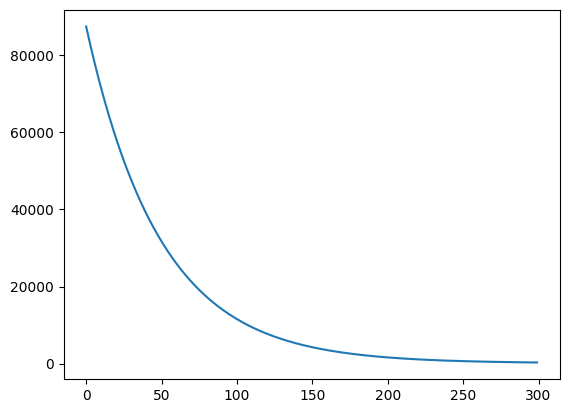

In [9]:
plt.plot(np.arange(len(error_list)), error_list)
plt.show()

In [10]:
final_error = error_list[-1]
final_error

307.11269159177647

In [22]:
def mini_batch_gradient_descent(X, y, batch_size = 200, learning_rate = 0.01, max_iters = 10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []

    data = np.hstack((X, y.reshape(-1, 1)))

    for i in range(max_iters) :

        # Mini - Batch Gradient Descent
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m // batch_size

        for j in range(total_batches):
            batch_data = data[j * batch_size : (j + 1) * batch_size, :]
            x_batch = batch_data[:, :-1]
            y_batch = batch_data[:, -1]

            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - learning_rate * batch_gradient

            e = error(x_batch, y_batch, theta)
            error_list.append(e)

    return theta, error_list

In [23]:
theta, error_list = mini_batch_gradient_descent(X, y)

In [24]:
theta

array([ 0.2408037 , 53.60536609, 80.4387576 , 93.55722439, 10.00706653,
       92.8796584 , 26.98315491, 36.04017682, 75.64852532, 24.44778488,
        4.80807696, 48.14272967, 43.97469844, 35.66118715, 64.89732049,
       85.57623463, 26.51269799, 98.78550964, 86.74692413, 96.07629595,
       76.50936465])

In [25]:
final_error = error_list[-1]
final_error

103.93377895588996

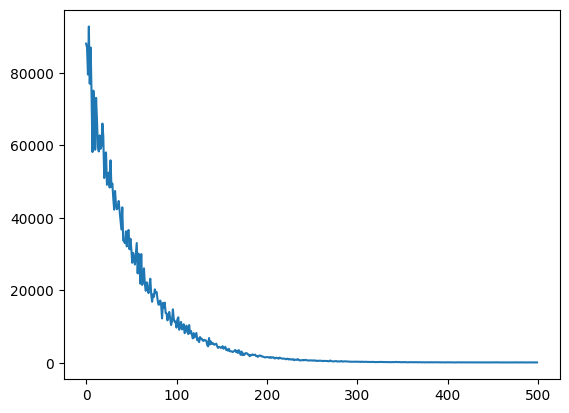

In [26]:
plt.plot(np.arange(len(error_list)), error_list)
plt.show()

In [27]:
theta, error_list = mini_batch_gradient_descent(X, y, batch_size=1)

In [28]:
final_error = error_list[-1]
final_error

78.11976594568634

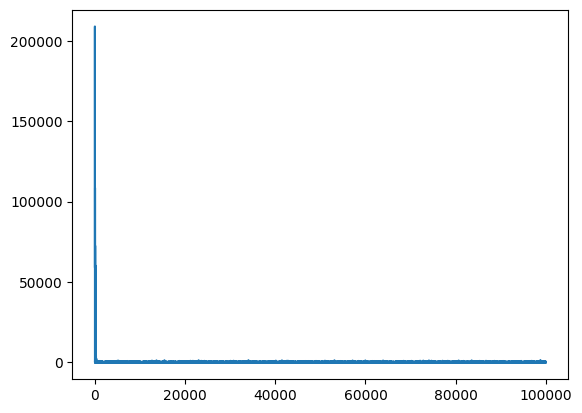

In [29]:
plt.plot(np.arange(len(error_list)), error_list)
plt.show()